# Plot event weights vs observables

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

from madminer.sampling import SampleAugmenter


In [2]:
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [3]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_4/'

In [4]:
sample_dir = base_dir + 'data/samples/wgamma_sys/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma_sys/'
log_dir = base_dir + 'logs/wgamma_sys/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'

## Load data

In [7]:
sa = SampleAugmenter(sample_dir + 'samples_tight.h5')

05:27 madminer.sampling    INFO    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma_sys/samples_tight.h5
05:27 madminer.sampling    INFO    Found 2 parameters
05:27 madminer.sampling    INFO    Found 55 nuisance parameters
05:27 madminer.sampling    INFO    Found 103 benchmarks, of which 6 physical
05:27 madminer.sampling    INFO    Found 33 observables
05:27 madminer.sampling    INFO    Found 1136213 events
05:27 madminer.sampling    INFO    Found morphing setup with 6 components
05:27 madminer.sampling    INFO    Found nuisance morphing setup


In [28]:
x, weights_sm = sa.extract_raw_data(theta=[0.,0.])
x, weights_bsm = sa.extract_raw_data(theta=[0.004,0.])

In [15]:
obs = list(sa.observables.keys())
n_obs = len(obs)
n_obs

33

## Plot weights vs observables

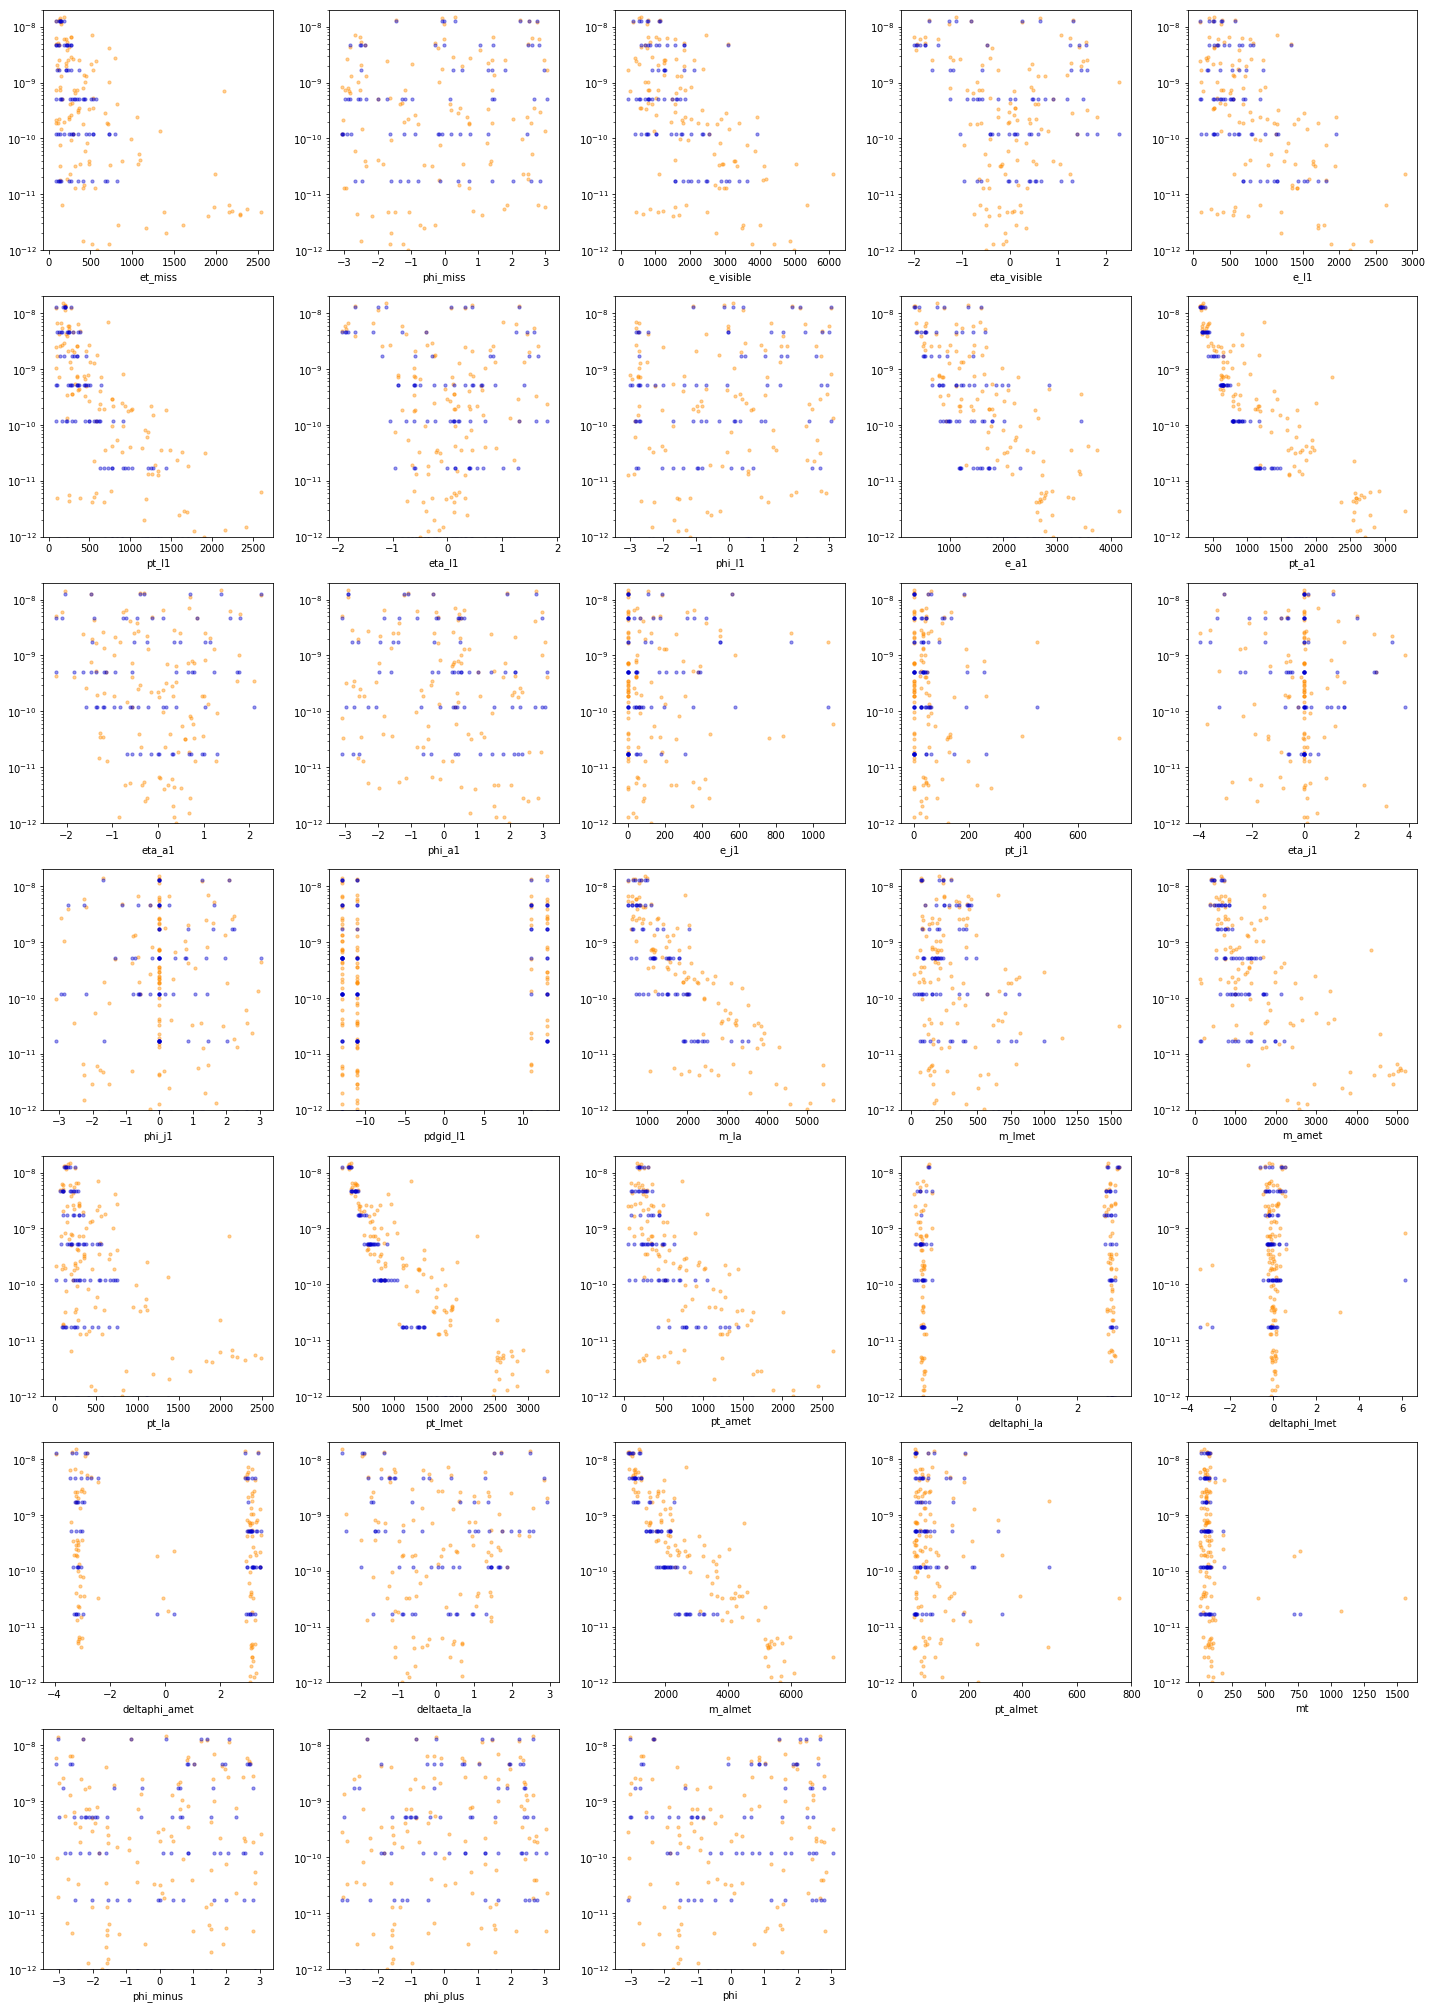

In [30]:
skip = 10000
ymin, ymax = 1.e-12, 2.e-8

fig = plt.figure(figsize=(20., 28.))
                 
for i in range(n_obs):
    ax = plt.subplot(7,5,i+1)
    
    plt.scatter(x[::skip, i], weights_bsm[::skip], s=10., alpha=0.4, c='darkorange')
    plt.scatter(x[::skip, i], weights_sm[::skip], s=10., alpha=0.4, c='mediumblue')
    
    plt.xlabel(obs[i])
    plt.ylim(ymin, ymax)
    ax.set_yscale("log", nonposy="clip")
    
plt.tight_layout()
plt.savefig('../../../figures/wgamma/weights.pdf')